In [1]:
import os
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import shap
import lime

SEED = 42

/home/alexandre/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#1.1.1
MNIST = sklearn.datasets.load_digits()
MNIST_train_x , MNIST_test_x, MNIST_train_y, MNIST_test_y = sklearn.model_selection.train_test_split(MNIST["data"], MNIST["target"], random_state=SEED)


precisition weighted : 0.971392467129592


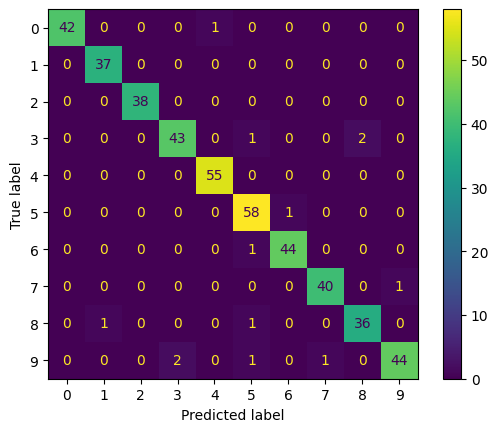

In [3]:
#1.1.2
random_forest_model = sklearn.ensemble.RandomForestClassifier(random_state=SEED)
random_forest_model.fit(MNIST_train_x, MNIST_train_y)
predicition = random_forest_model.predict(MNIST_test_x)
confusus_matrix = sklearn.metrics.confusion_matrix(MNIST_test_y, predicition)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusus_matrix)
precision = sklearn.metrics.precision_score(MNIST_test_y, predicition, average='weighted')
print("precisition weighted :",precision)
disp.plot()

Il y a tres peu d'erreur, la précision est trés bonne donc le modèle est bon.

true 6 : 0 
false 6: 339


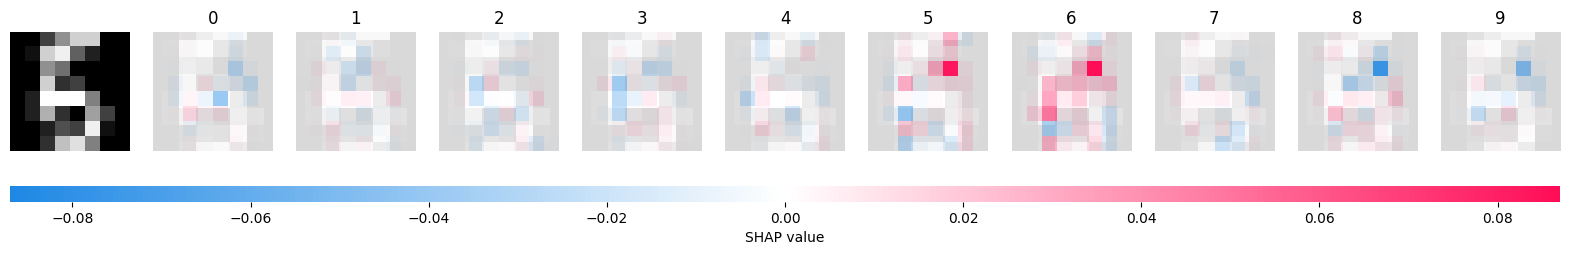

In [41]:
#1.2.3
import sklearn.datasets


true_6 = None
false_6 = None
for i in range(len(predicition)):
    if true_6 is None and MNIST_test_y[i] == 6 and predicition[i] == 6:
        true_6 = i
        if false_6 is not None:
            break
    if false_6 is None and MNIST_test_y[i] != 6 and predicition[i] == 6:
        false_6 = i
        if true_6 is not None:
            break

print("true 6 :", true_6, "\nfalse 6:", false_6)

#print(MNIST_test_x[0].reshape(8,8))
#shap_explain = shap.TreeExplainer(random_forest_model).shap_values(MNIST_test_x[true_6])
shap_value = shap.TreeExplainer(random_forest_model).shap_values(MNIST_test_x[false_6])     
# shap.image_plot(shap_value[0])
# print(shap_value)
# print(len(shap_value))
# shape_values_reshaped = np.empty([10, 8, 8])
# i = 0
# for l in shap_value:
#     for v in range(len(l)):
#         shape_values_reshaped[v][i // 8][i % 8] = l[v]
#     i+=1


shape_values_reshaped = [ sv.reshape(-1,8,8,1) for sv in np.transpose(shap_value) ]

mistaken_6 = MNIST_test_x[false_6].reshape(-1, 8,8, 1)

shap.image_plot(shape_values_reshaped, mistaken_6 ,[0,1,2,3,4,5,6,7,8,9])